In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
im = cv2.imread('img/tulips.jpeg')

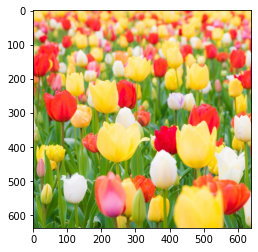

In [3]:
plt.imshow(im[:,:, ::-1])

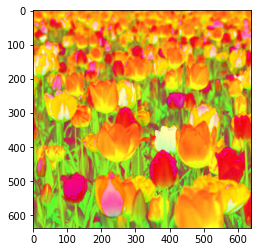

In [5]:
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
plt.imshow(hsv[:, :, ::-1])

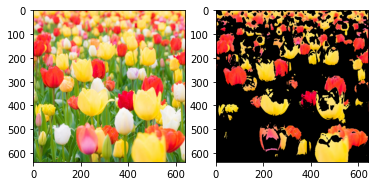

In [64]:
# images with all colors (first value from 0 to 255), high saturation and high value (let's start from top 20%)
low_bound = np.array([0, 130, 230])
upper_bound = np.array([255, 255, 255])

# create a mask
mask_bright = cv2.inRange(hsv, low_bound, upper_bound)

# back to BGR to apply mask
bright_zones = cv2.bitwise_and(im, im, mask=mask_bright)
# plot original and result
plt.figure(1)
plt.subplot(121)
plt.imshow(im[:,:,::-1])
plt.subplot(122)
plt.imshow(bright_zones[:,:,::-1])
plt.show()

* doesn't capture white color

Capture brightness through converting to grayscale image

In [13]:
gr = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

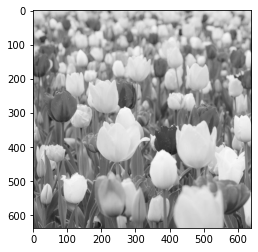

In [16]:
plt.imshow(gr, cmap='gray')

In [18]:
cv2.minMaxLoc(gr)

(14.0, 255.0, (400, 418), (603, 319))

In [20]:
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gr)

In [23]:
gr.shape

(638, 640)

In [24]:
gr[:5]

array([[227, 227, 227, ..., 194, 190, 186],
       [227, 227, 227, ..., 203, 199, 195],
       [226, 226, 226, ..., 210, 206, 204],
       [225, 225, 226, ..., 213, 210, 208],
       [224, 224, 225, ..., 216, 213, 211]], dtype=uint8)

In [28]:
gr_mask = np.where(gr > 200, 255, 0)

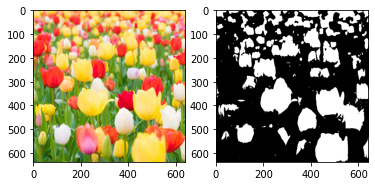

In [29]:
# plot original and result
plt.figure(1)
plt.subplot(121)
plt.imshow(im[:,:,::-1])
plt.subplot(122)
plt.imshow(gr_mask, cmap='gray')
plt.show()

Back to HSV, let's see if I can capture white as well

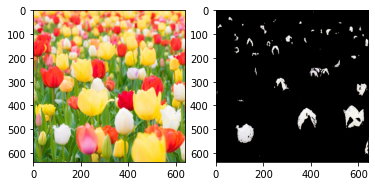

In [79]:
# define range of white color in HSV
# change it according to your need !
lower_white = np.array([0,0,168], dtype=np.uint8)
upper_white = np.array([172,20,255], dtype=np.uint8)

# Threshold the HSV image to get only white colors
mask_white = cv2.inRange(hsv, lower_white, upper_white)

mask = mask_bright | mask_white
result = cv2.bitwise_and(im, im, mask=mask_white)
# plot original and result
plt.figure(1)
plt.subplot(121)
plt.imshow(im[:,:,::-1])
plt.subplot(122)
plt.imshow(result[:,:,::-1])
plt.show()

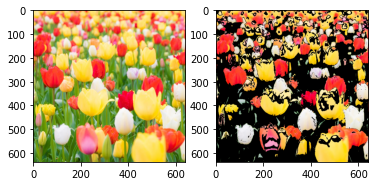

In [55]:
# define range of white color in HSV
# change it according to your need !
lower_white = np.array([0,0,168], dtype=np.uint8)
upper_white = np.array([172,100,255], dtype=np.uint8)

# Threshold the HSV image to get only white colors
mask_white = cv2.inRange(hsv, lower_white, upper_white)

mask = mask_bright | mask_white
result = cv2.bitwise_and(im, im, mask=mask)
# plot original and result
plt.figure(1)
plt.subplot(121)
plt.imshow(im[:,:,::-1])
plt.subplot(122)
plt.imshow(result[:,:,::-1])
plt.show()

Mask contains only 2 values - 0 and 255.
If the pixel satisfy the requirments, it's 255, otherwise - 0

In [69]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [46]:
# doesn't capture white

In [41]:
mask.dtype, gr_mask.dtype

(dtype('uint8'), dtype('int64'))

In [36]:
mask.shape, gr_mask.shape

((638, 640), (638, 640))

In [42]:
gr_mask.dtype = 'uint8'

In [44]:
gr_mask.dtype

dtype('uint8')

In [68]:
# throws an error, doesn't accept gray mask
#result_gr = cv2.bitwise_and(im, im, mask=gr_mask)

In [65]:
blue = cv2.imread('img/blue.jpeg')

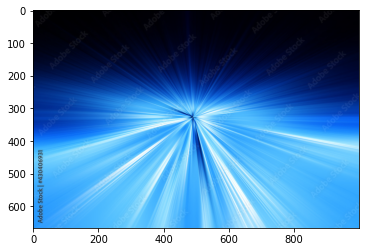

In [67]:
plt.imshow(blue[:, :, ::-1]);

In [70]:
blue_hsv = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)

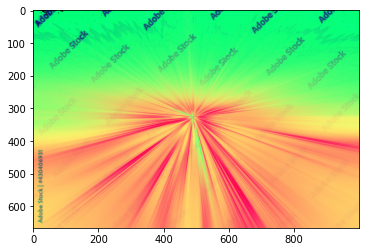

In [71]:
plt.imshow(blue_hsv[:, :, ::-1]);

In [80]:


# create a mask
mask_bright_blue = cv2.inRange(blue_hsv, low_bound, upper_bound)

# Threshold the HSV image to get only white colors
mask_white_blue = cv2.inRange(blue_hsv, lower_white, upper_white)

mask_blue = mask_bright_blue | mask_white_blue

blue_result = cv2.bitwise_and(blue, blue, mask=mask_blue)

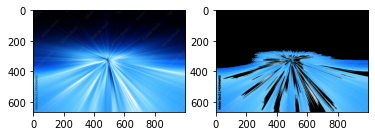

In [81]:
# plot original and result
plt.figure(1)
plt.subplot(121)
plt.imshow(blue[:,:,::-1])
plt.subplot(122)
plt.imshow(blue_result[:,:,::-1])
plt.show()

### convert to HSL 